In [3]:
import pandas as pd

df = pd.read_csv('SIGNALS 2018.csv')
choupinet = pd.DataFrame()

DT = []
OL = []
CL = []
OS = []
CS = []
XP = []
PNL = []
CUM = []
YMCA = []
NETL = []
NETS = []
LAT = []
XPL = []
XPS = []
MDD = []
NXP = []

ol = 0
cl = 0
os = 0
cs = 0
xp = 0
pnl = 0
cum = 0
ymca = 0
netl = 0
nets = 0
lat = 0
xpl = 0
xps = 0
mdd = 0
nxp = 0

for i in range(1,df.shape[0]):
    if df.iloc[i-1,0] == df.iloc[i,0]:
        ol += df.iloc[i,2]
        cl += df.iloc[i,3]
        os += df.iloc[i,4]
        cs += df.iloc[i,5]
        if df.iloc[i,3] == 1 or df.iloc[i,5] == 1 :
            xp = xp - (df.iloc[i,6] * df.iloc[i,7])
        if df.iloc[i,2] == 1 or df.iloc[i,4] == 1 :
            xp = xp + (df.iloc[i,6] * df.iloc[i,7])
        
        try:
            cum += df.iloc[i,8]
        except:
            cum += 0
        pnl += df.iloc[i,8]
        lat += df.iloc[i,10]
        
        if df.iloc[i,2] == 1:
            xpl = xpl + (df.iloc[i,6] * df.iloc[i,7])
        if df.iloc[i,3] == 1:
            xpl = xpl - (df.iloc[i,6] * df.iloc[i,7])
        
        if df.iloc[i,4] == 1:
            xps = xps + (df.iloc[i,6] * df.iloc[i,7])
        if df.iloc[i,5] == 1:
            xps = xps - (df.iloc[i,6] * df.iloc[i,7])
        
        
        nxp =xpl - xps
        
    else:
        if lat.min() < 0:
            mdd = lat.min()
        ymca = 400000 + cum + lat
        netl = netl + ol - cl
        nets = nets + os - cs
        DT.append(df.iloc[i-1,0])
        OL.append(ol)
        CL.append(cl)
        OS.append(os)
        CS.append(cs)
        XP.append(xp)
        PNL.append(pnl)
        CUM.append(cum)
        YMCA.append(ymca)
        NETL.append(netl)
        NETS.append(nets)
        LAT.append(lat)
        XPL.append(xpl)
        XPS.append(xps)
        MDD.append(mdd)
        NXP.append(nxp)
        ol = 0
        cl = 0
        os = 0
        cs = 0
        pnl = 0
        lat = 0
        mdd = 0
        
choupinet['Date'] = DT
choupinet['Open Long'] = OL
choupinet['Close Long'] = CL
choupinet['Open Short'] = OS
choupinet['Close Short'] = CS
choupinet['Exposure Long'] = XPL
choupinet['Exposure Short'] = XPS
choupinet['Exposure'] = XP
choupinet['Net Exposure'] = NXP
choupinet['PNL'] = PNL
choupinet['Unrealized PNL'] = LAT
choupinet['Cumulative PNL'] = CUM
choupinet['NAV'] = YMCA
choupinet['Net Long'] = NETL
choupinet['Net Short'] = NETS
choupinet['Maximum Drawdown'] = MDD

choupinet.to_csv('portfolio_2018.csv')

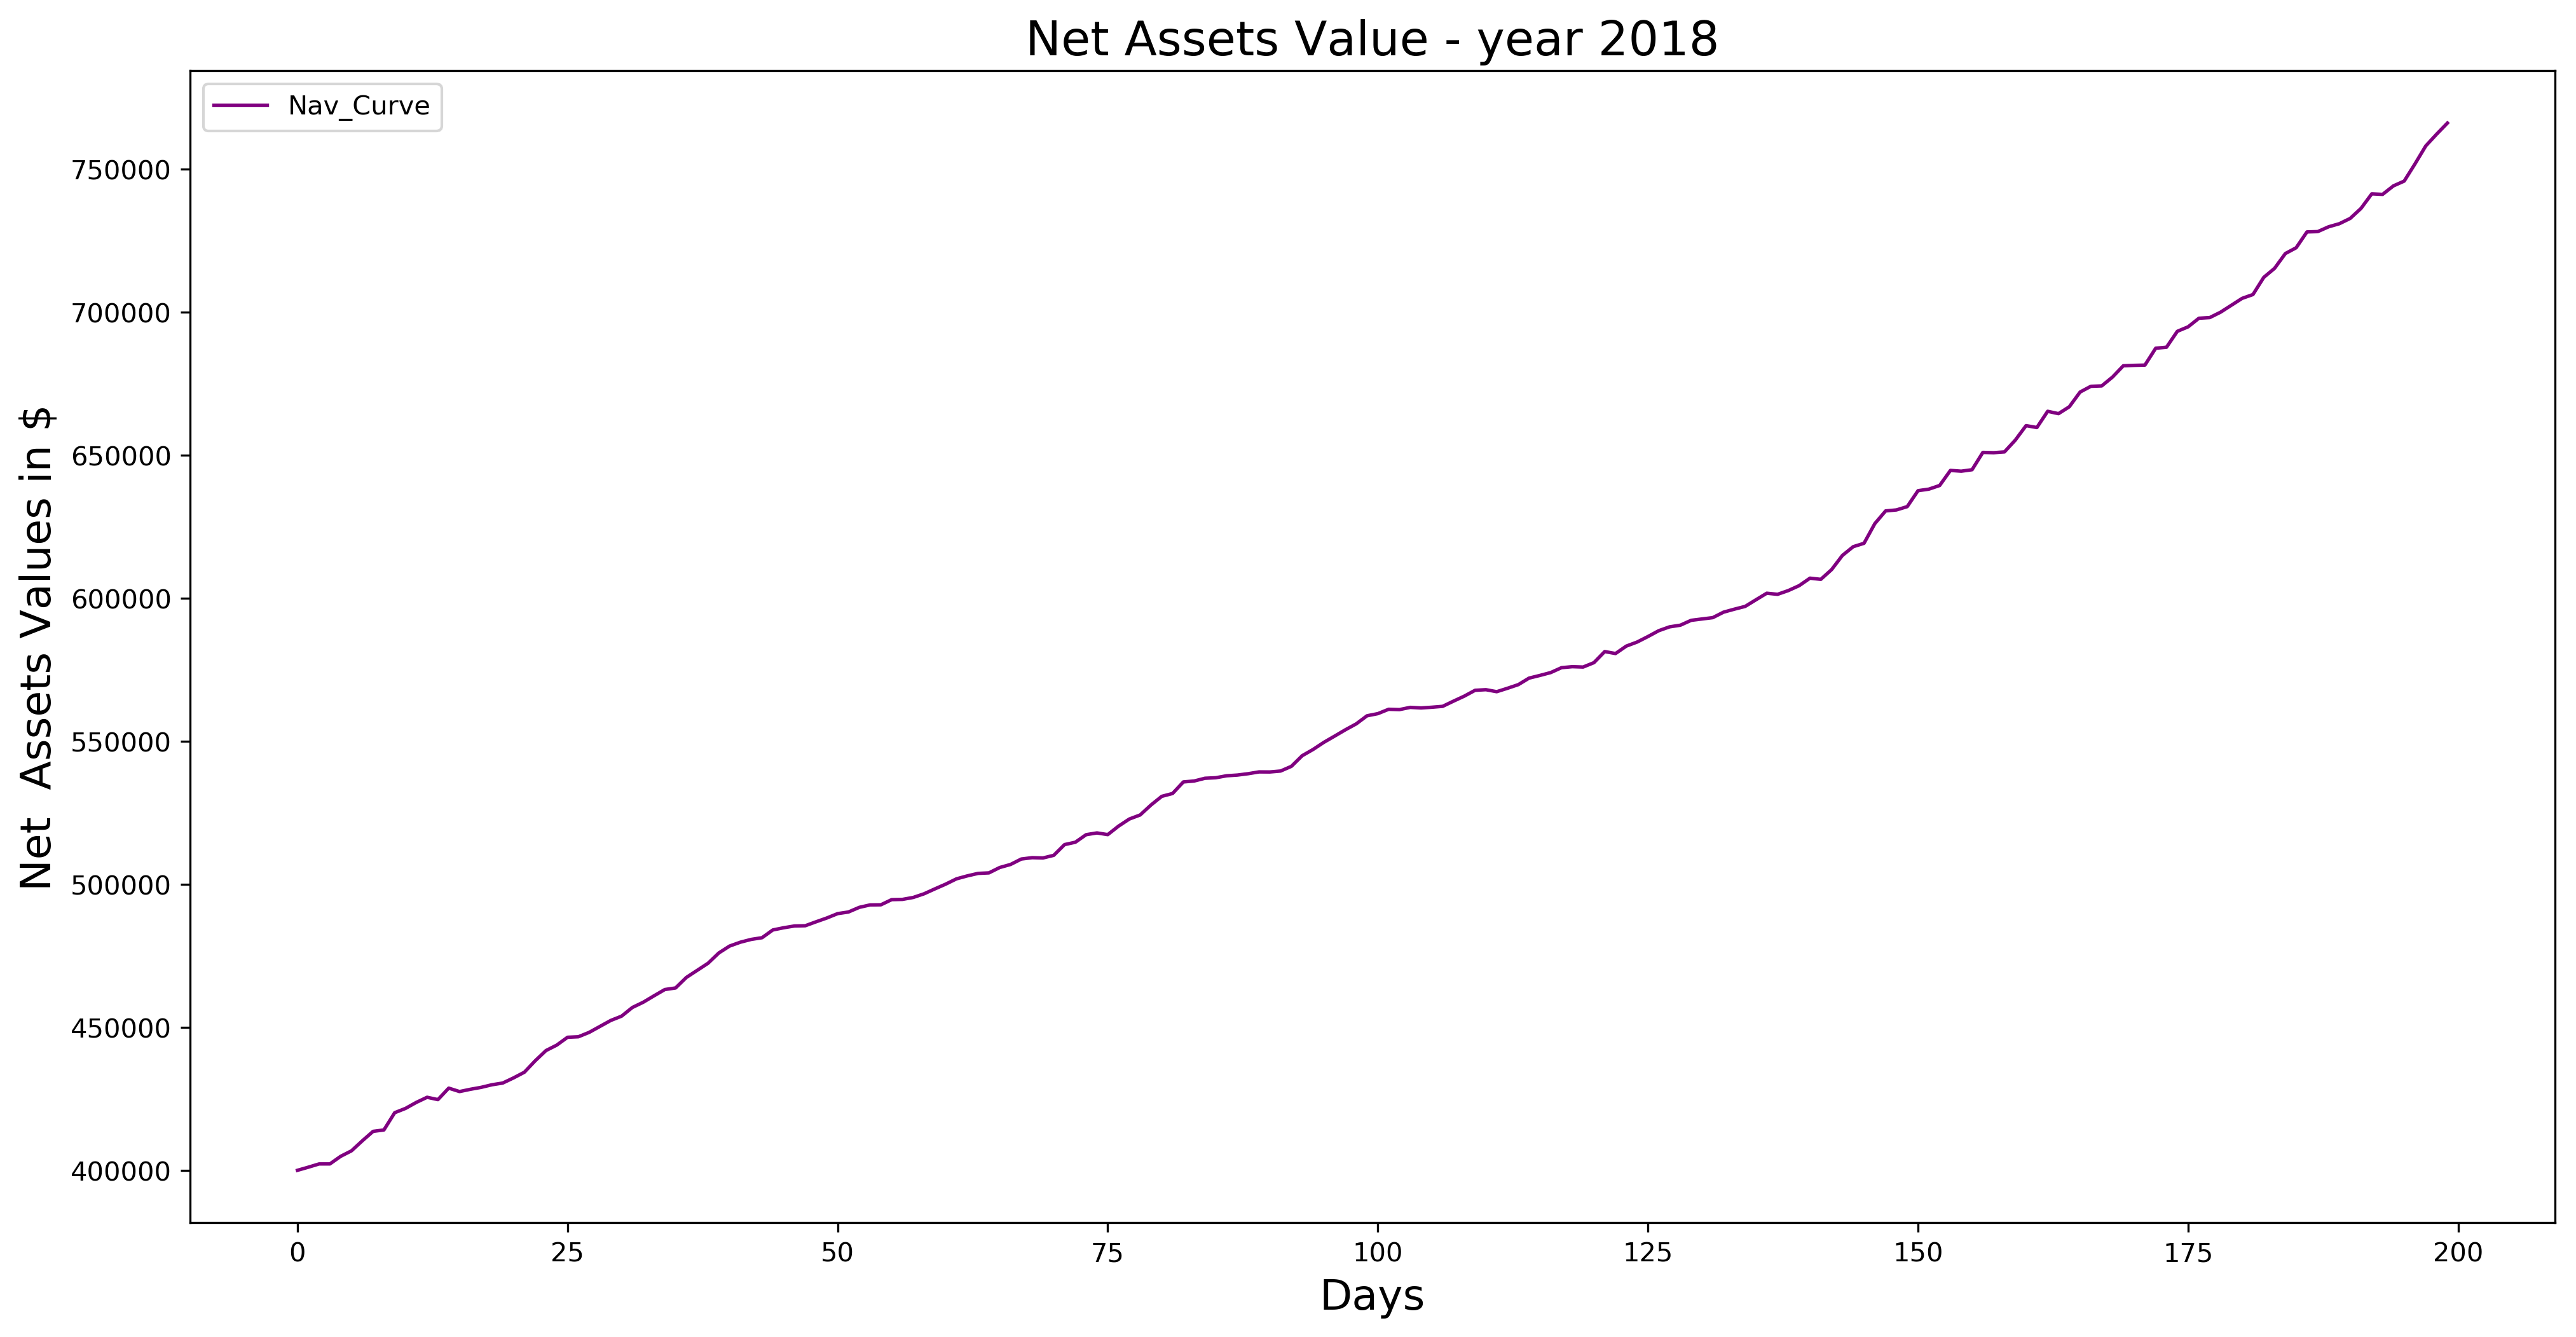

In [4]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter

plt.figure(figsize=(16,8),dpi=300)


plt.title("Net Assets Value - year 2018",fontsize=18)
plt.xlabel("Days",fontsize=16)
plt.ylabel("Net  Assets Values in $",fontsize=16)
plt.plot(choupinet['NAV'],color='purple',lw=1.3,label='Nav_Curve')
plt.legend()
plt.savefig('NAV_Curve_2018.png')